In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

Food = pd.read_csv('worldFoodProduction.csv')
print(Food)

            Entity  Year  Maize Production (tonnes)  \
0      Afghanistan  1961                   700000.0   
1      Afghanistan  1962                   700000.0   
2      Afghanistan  1963                   713000.0   
3      Afghanistan  1964                   720000.0   
4      Afghanistan  1965                   720000.0   
...            ...   ...                        ...   
11907     Zimbabwe  2017                  1532572.0   
11908     Zimbabwe  2018                  1560100.0   
11909     Zimbabwe  2019                   773976.0   
11910     Zimbabwe  2020                  1202347.0   
11911     Zimbabwe  2021                  1469664.0   

       Rice  Production ( tonnes)  Yams  Production (tonnes)  \
0                       319000.00               7.467702e+06   
1                       319000.00               7.420515e+06   
2                       319000.00               8.479074e+06   
3                       380000.00               9.113779e+06   
4                  

In [2]:
crop_columns = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Yams  Production (tonnes)',
                'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)', 'Tea  Production ( tonnes )',
                'Sweet potatoes  Production (tonnes)', 'Sunflower seed  Production (tonnes)', 
                'Sugar cane Production (tonnes)', 'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)',
                'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)', 'Peas, dry Production ( tonnes)',
                'Palm oil  Production (tonnes)', 'Grapes  Production (tonnes)', 'Coffee, green Production ( tonnes)',
                'Cocoa beans Production (tonnes)', 'Meat, chicken  Production (tonnes)', 'Bananas  Production ( tonnes)',
                'Avocados Production (tonnes)', 'Apples Production (tonnes)']

# Calculate the total production for each crop
total_productions = {crop: Food[crop].sum() for crop in crop_columns}

# Convert the dictionary to a DataFrame
total_productions_Crops = pd.DataFrame(list(total_productions.items()), columns=['Crop', 'Total Production'])

# Sort the DataFrame by 'Total Production' in descending order and get the top 5
top_5_crops = total_productions_Crops.sort_values('Total Production', ascending=False).head(5)

print(top_5_crops)

                              Crop  Total Production
8   Sugar cane Production (tonnes)      6.216172e+11
3        Wheat Production (tonnes)      2.818003e+11
1       Rice  Production ( tonnes)      2.685610e+11
0        Maize Production (tonnes)      2.294768e+11
11   Potatoes  Production (tonnes)      1.459314e+11


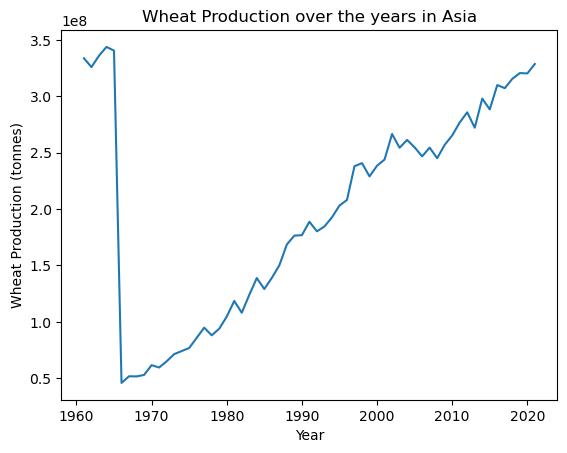

In [3]:
country_data = Food[Food['Entity'] == 'Asia']
plt.plot(country_data['Year'], country_data['Wheat Production (tonnes)'])
plt.xlabel('Year')
plt.ylabel('Wheat Production (tonnes)')
plt.title('Wheat Production over the years in Asia')
plt.show()

In [4]:
def model_func(x, a, b):
    return a * x + b

# Get the data for a specific country and food item
x_data = Food[Food['Entity'] == 'Asia']['Year']
y_data = Food[Food['Entity'] == 'Asia']['Wheat Production (tonnes)']

# Fit the function to the data
popt, pcov = curve_fit(model_func, x_data, y_data)

# Print the optimal parameters a and b
print(popt)

[ 3.07996838e+06 -5.93287026e+09]


In [5]:
crop_columns = ['Wheat Production (tonnes)', 'Rice  Production ( tonnes)', 'Maize Production (tonnes)', 'Potatoes  Production (tonnes)', 'Sugar cane Production (tonnes)']

# For each crop, calculate the total production for each country and get the top 5 countries
for crop in crop_columns:
    top_countries = Food.groupby('Entity')[crop].sum().nlargest(5)
    print(f"\nTop 5 countries for {crop}:\n", top_countries)


Top 5 countries for Wheat Production (tonnes):
 Entity
Saint Lucia             2.510509e+10
Poland                  1.262202e+10
Asia                    1.216015e+10
Eastern Africa (FAO)    1.188437e+10
Cote d'Ivoire           1.166755e+10
Name: Wheat Production (tonnes), dtype: float64

Top 5 countries for Rice  Production ( tonnes):
 Entity
Asia                    2.816750e+10
South Africa            1.760215e+10
Armenia                 1.754539e+10
Western Africa (FAO)    1.590521e+10
South America           1.338558e+10
Name: Rice  Production ( tonnes), dtype: float64

Top 5 countries for Maize Production (tonnes):
 Entity
World                            3.503807e+10
Americas (FAO)                   1.863352e+10
High-income countries            1.626493e+10
North America                    1.504534e+10
Upper-middle-income countries    1.389193e+10
Name: Maize Production (tonnes), dtype: float64

Top 5 countries for Potatoes  Production (tonnes):
 Entity
El Salvador             1.

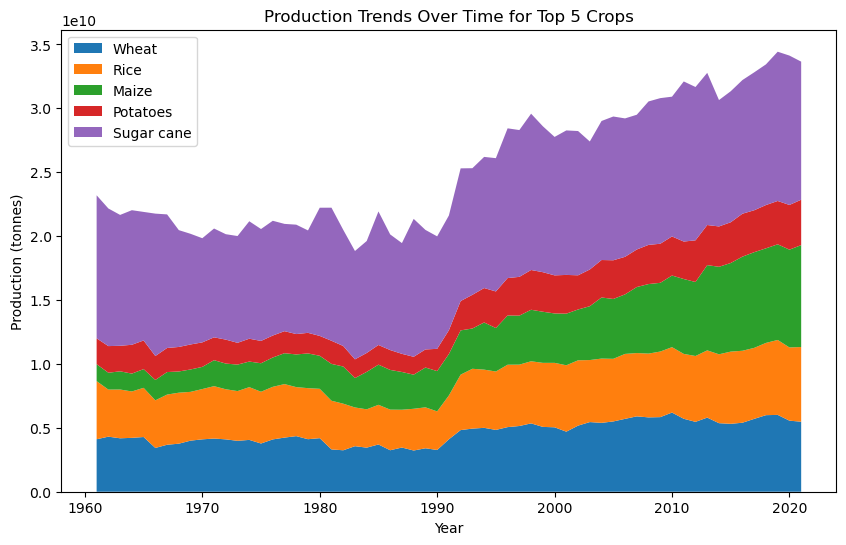

In [6]:
Food_production = Food[['Entity', 'Year', 'Wheat Production (tonnes)', 'Rice  Production ( tonnes)', 'Maize Production (tonnes)', 'Potatoes  Production (tonnes)', 'Sugar cane Production (tonnes)']]

# Drop rows with missing values
Food_production = Food_production.dropna()

# Group by Year and calculate the sum of production for each crop
grouped = Food_production.groupby('Year').sum()

# Plot the area chart
plt.figure(figsize=(10, 6))
plt.stackplot(grouped.index, grouped['Wheat Production (tonnes)'], grouped['Rice  Production ( tonnes)'], grouped['Maize Production (tonnes)'], grouped['Potatoes  Production (tonnes)'], grouped['Sugar cane Production (tonnes)'], labels=['Wheat','Rice','Maize', 'Potatoes', 'Sugar cane'])
plt.legend(loc='upper left')
plt.title('Production Trends Over Time for Top 5 Crops')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.show()

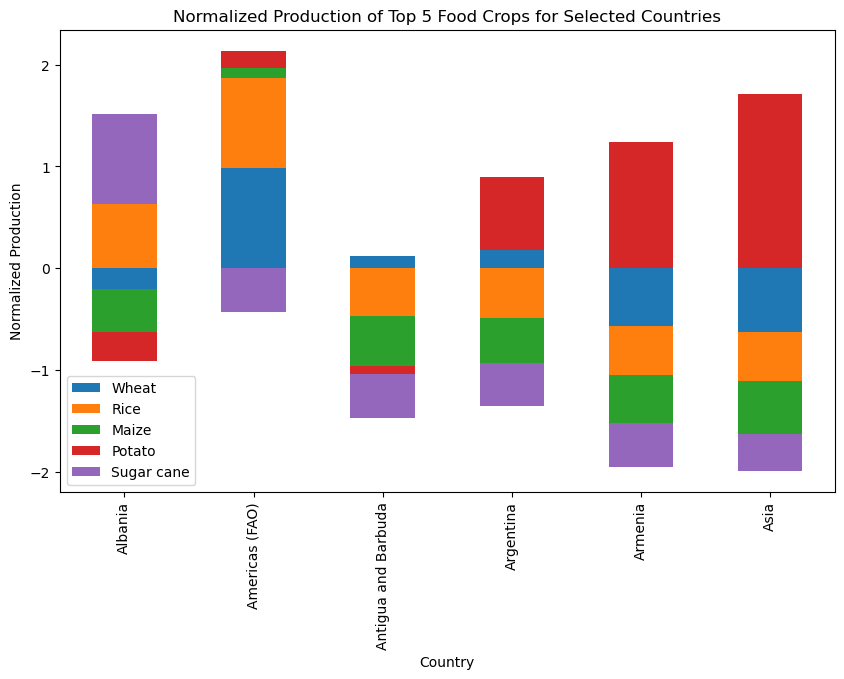

In [7]:
Food_production = Food[['Entity', 'Wheat Production (tonnes)', 'Rice  Production ( tonnes)', 'Maize Production (tonnes)', 'Potatoes  Production (tonnes)', 'Sugar cane Production (tonnes)']]


countries = ['Saint Lucia', 'Poland', 'Asia', 'Eastern Africa (FAO)', 'Cote d\'Ivoire', 'South Africa', 'Armenia', 'Western Africa (FAO)', 'South America', 'World', 'Americas (FAO)', 'High-income countries', 'North America', 'Upper-middle-income countries', 'El Salvador', 'Egypt', 'Ukraine', 'Dominica', 'Peru', 'Albania', 'Oceania', 'Antigua and Barbuda', 'Argentina']
Food_production = Food_production[Food_production['Entity'].isin(countries)]

# Drop rows with missing values
Food_production = Food_production.dropna()

# Normalize the data
scaler = StandardScaler()
Food_normalized = pd.DataFrame(scaler.fit_transform(Food_production[['Wheat Production (tonnes)', 'Rice  Production ( tonnes)', 'Maize Production (tonnes)', 'Potatoes  Production (tonnes)', 'Sugar cane Production (tonnes)']]), columns=['Wheat', 'Rice', 'Maize', 'Potato', 'Sugar cane'])

# Add the 'Entity' column to the normalized DataFrame
Food_normalized['Entity'] = Food_production['Entity']

# Group by 'Entity' and calculate the mean of production for each crop
grouped = Food_normalized.groupby('Entity').mean()

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Production of Top 5 Food Crops for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Normalized Production')
plt.show()

C:\Users\vinay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vinay\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


cluster
0    11270
2      365
1      277
Name: count, dtype: int64


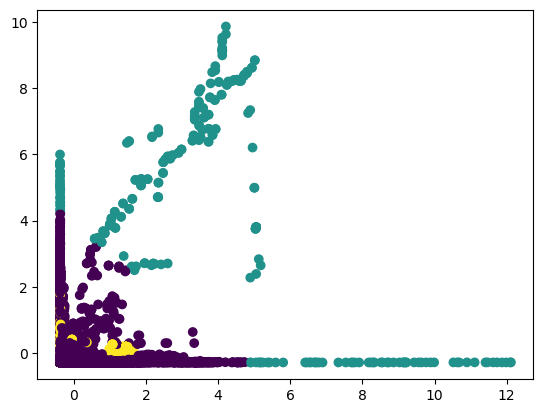

In [8]:
Food_cluster = Food[['Entity', 'Wheat Production (tonnes)', 'Rice  Production ( tonnes)', 'Maize Production (tonnes)']]

# Drop rows with missing values
Food_cluster = Food_cluster.dropna()

# Normalize the data
scaler = StandardScaler()
Food_normalized = scaler.fit_transform(Food_cluster[['Wheat Production (tonnes)', 'Rice  Production ( tonnes)', 'Maize Production (tonnes)']])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Change n_clusters as per your requirement
Food_cluster['cluster'] = kmeans.fit_predict(Food_normalized)

# Print the number of countries in each cluster
print(Food_cluster['cluster'].value_counts())

# Plot the clusters for visualization
plt.scatter(Food_normalized[:,0], Food_normalized[:,1], c=Food_cluster['cluster'])
plt.show()

C:\Users\vinay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


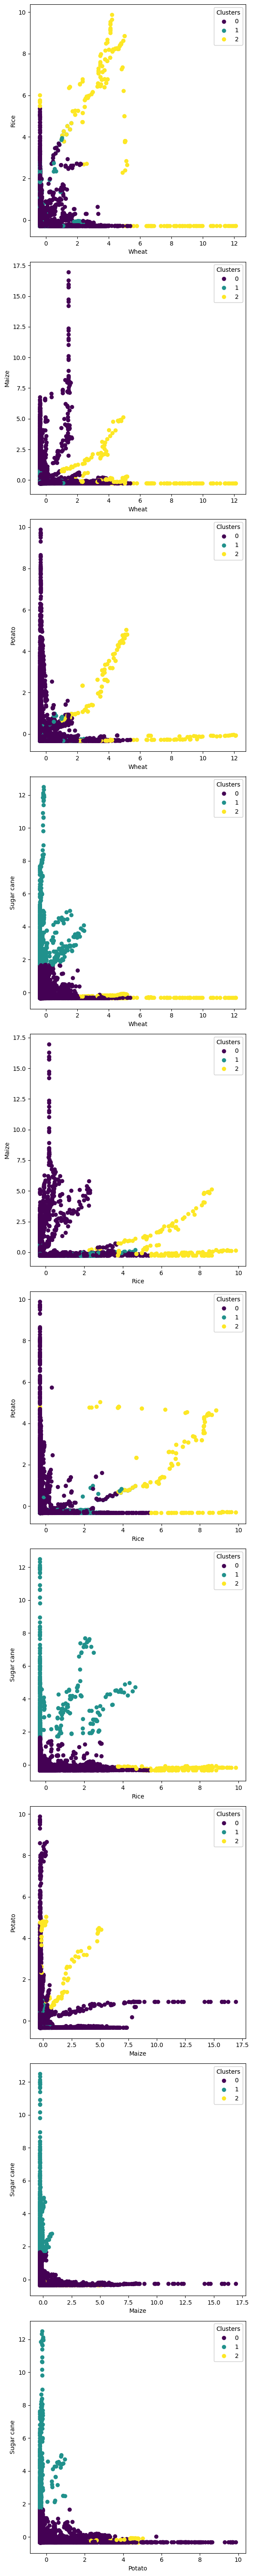

In [9]:
Food_production = Food[['Entity', 'Wheat Production (tonnes)', 'Rice  Production ( tonnes)', 'Maize Production (tonnes)', 'Potatoes  Production (tonnes)', 'Sugar cane Production (tonnes)']]

countries = ['Saint Lucia', 'Poland', 'Asia', 'Eastern Africa (FAO)', 'Cote d\'Ivoire', 'South Africa', 'Armenia', 'Western Africa (FAO)', 'South America', 'World', 'Americas (FAO)', 'High-income countries', 'North America', 'Upper-middle-income countries', 'El Salvador', 'Egypt', 'Ukraine', 'Dominica', 'Peru', 'Albania', 'Oceania', 'Antigua and Barbuda', 'Argentina']
Food_production = Food_production.dropna()
scaler = StandardScaler()
Food_normalized = pd.DataFrame(scaler.fit_transform(Food_production[['Wheat Production (tonnes)', 'Rice  Production ( tonnes)', 'Maize Production (tonnes)', 'Potatoes  Production (tonnes)', 'Sugar cane Production (tonnes)']]), columns=['Wheat', 'Rice', 'Maize', 'Potato', 'Sugar cane'])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Change n_clusters as per your requirement
Food_normalized['cluster'] = kmeans.fit_predict(Food_normalized)

# Create scatter plots for each pair of crops
fig, axs = plt.subplots(10, figsize=(6, 60))
pairs = [(a, b) for a in range(5) for b in range(a+1, 5)]
for (a, b), ax in zip(pairs, axs):
    scatter = ax.scatter(Food_normalized.iloc[:, a], Food_normalized.iloc[:, b], c=Food_normalized['cluster'])
    ax.set_xlabel(Food_normalized.columns[a])
    ax.set_ylabel(Food_normalized.columns[b])
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
plt.tight_layout()
plt.show()

Not enough data points for Finland and Wheat Production (tonnes)


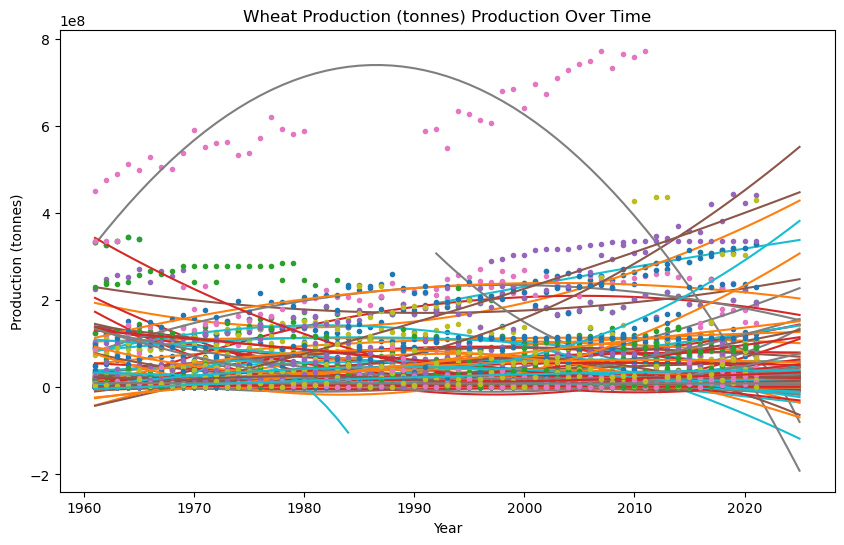

C:\Users\vinay\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\vinay\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Not enough data points for Finland and Rice  Production ( tonnes)


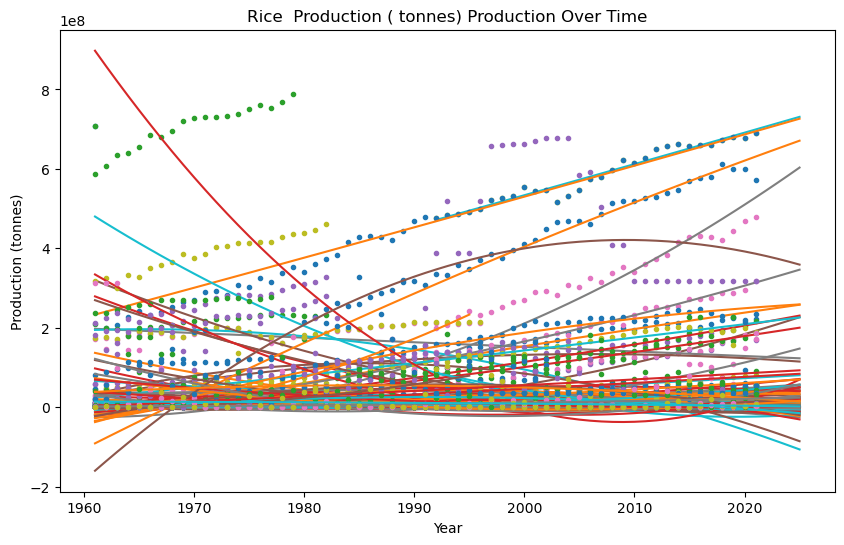

In [10]:
Food_production = Food[['Entity', 'Year', 'Wheat Production (tonnes)', 'Rice  Production ( tonnes)']]
def poly_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the model for each crop and each region, and create the plots
for crop in ['Wheat Production (tonnes)', 'Rice  Production ( tonnes)']:
    plt.figure(figsize=(10, 6))
    for region in Food_production['Entity'].unique():
        # Get the data for the current region
        region_data = Food_production[Food_production['Entity'] == region]
        x_data = region_data['Year']
        y_data = region_data[crop]

        if len(x_data) > 3:
            # Fit the model to the data
            try:
                popt, pcov = curve_fit(poly_model, x_data, y_data)

                # Project into the future
                x_future = np.arange(x_data.min(), x_data.max() + 5)  # Change 10 to the number of years you want to project into the future
                y_future = poly_model(x_future, *popt)

                # Plot the original data and the fit
                plt.plot(x_data, y_data, '.', label=f'{region} data')
                plt.plot(x_future, y_future, '-', label=f'{region} fit')
            except RuntimeError:
                print(f"Could not fit the model for {region} and {crop}")
        else:
            print(f"Not enough data points for {region} and {crop}")

    # Add labels and a legend
    plt.title(f'{crop} Production Over Time')
    plt.xlabel('Year')
    plt.ylabel('Production (tonnes)')
    plt.show()

